In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from datetime import datetime

sns.set()

%matplotlib inline

In [2]:
df_raw = pd.concat(map(
    pd.read_csv,
    [
        "https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2020-01.csv",
        "https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2020-02.csv"
    ]
))

# rename columns to english
df_raw.columns = ["User_gender", "User_age", "Bicycle", "Borrow_dock", "Borrow_date", "Borrow_time", "Return_dock", "Return_date", "Return_time"]
df_raw.head(5)

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_date,Borrow_time,Return_dock,Return_date,Return_time
0,F,33,8744,52,01/01/2020,0:05:06,3,01/01/2020,0:13:00
1,M,30,7865,31,01/01/2020,0:09:50,271,01/01/2020,0:21:30
2,F,36,7819,251,01/01/2020,0:13:25,150,01/01/2020,0:26:10
3,F,33,11258,3,01/01/2020,0:15:22,1,01/01/2020,0:25:29
4,M,29,7722,136,01/01/2020,0:18:42,63,01/01/2020,0:24:01


In [3]:
def parse_dt(dt, format_string="%d/%m/%Y %H:%M:%S"):
    return datetime.strptime(dt, format_string)


def convert_dates(dataframe):
    dataframe["Borrow_datetime"] = (dataframe["Borrow_date"] + " " + dataframe["Borrow_time"]).apply(lambda r: parse_dt(r))
    dataframe["Return_datetime"] = (dataframe["Return_date"] + " " + dataframe["Return_time"]).apply(lambda r: parse_dt(r))
    return dataframe
    

In [4]:
df = convert_dates(df_raw)
df = df[["User_gender", "User_age", "Bicycle", "Borrow_dock", "Borrow_datetime", "Return_dock", "Return_datetime"]]

# index the df with datetime
df.index = df["Borrow_datetime"]

# select only jan and feb
df = pd.concat([df.loc["2020-01"], df.loc["2020-02"]])

df.head()

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_datetime,Return_dock,Return_datetime
Borrow_datetime,,,,,,,
2020-01-01 00:05:06,F,33,8744,52,2020-01-01 00:05:06,3,2020-01-01 00:13:00
2020-01-01 00:09:50,M,30,7865,31,2020-01-01 00:09:50,271,2020-01-01 00:21:30
2020-01-01 00:13:25,F,36,7819,251,2020-01-01 00:13:25,150,2020-01-01 00:26:10
2020-01-01 00:15:22,F,33,11258,3,2020-01-01 00:15:22,1,2020-01-01 00:25:29
2020-01-01 00:18:42,M,29,7722,136,2020-01-01 00:18:42,63,2020-01-01 00:24:01


In [5]:
df_jan = df.loc["2020-01"]

In [6]:
df_jan.loc["2020-01-14"]

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_datetime,Return_dock,Return_datetime
Borrow_datetime,,,,,,,
2020-01-14 00:00:18,M,32,6866,15,2020-01-14 00:00:18,127,2020-01-14 00:08:37
2020-01-14 00:00:59,M,24,4238,131,2020-01-14 00:00:59,122,2020-01-14 00:09:26
2020-01-14 00:01:01,M,52,12377,133,2020-01-14 00:01:01,136,2020-01-14 00:06:20
2020-01-14 00:01:14,M,38,9652,64,2020-01-14 00:01:14,37,2020-01-14 00:05:58
2020-01-14 00:01:55,M,30,4162,81,2020-01-14 00:01:55,171,2020-01-14 00:07:56
...,...,...,...,...,...,...,...
2020-01-14 23:58:01,M,22,8260,115,2020-01-14 23:58:01,269,2020-01-15 00:16:51
2020-01-14 08:43:49,M,46,12346,154,2020-01-14 08:43:49,141,2020-01-16 09:15:07
2020-01-14 09:03:14,M,43,10440,22,2020-01-14 09:03:14,36,2020-01-17 03:48:36


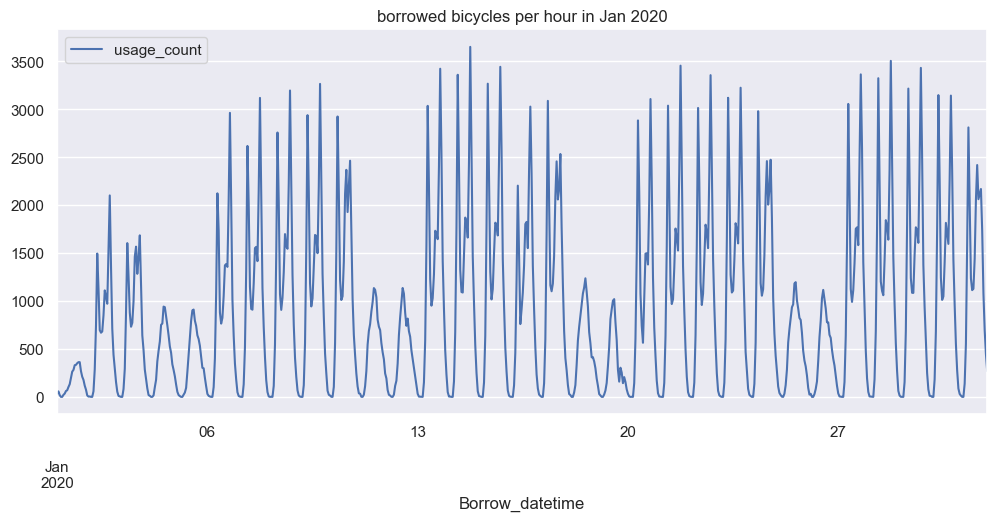

In [7]:
df_hour = pd.DataFrame(df_jan["Bicycle"].resample("H").count().rename("usage_count"))

df_hour.plot(title="borrowed bicycles per hour in Jan 2020", figsize=(12, 5))
plt.show()

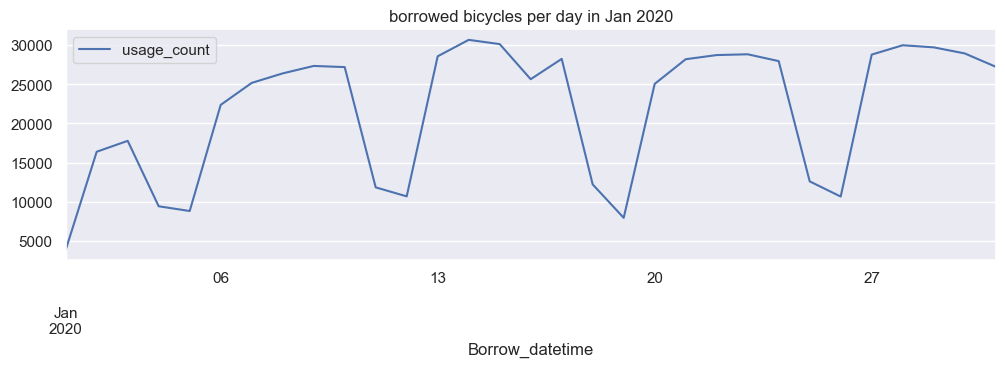

In [8]:
df_day = pd.DataFrame(df_jan["Bicycle"].resample("D").count().rename("usage_count"))

df_day.plot(title="borrowed bicycles per day in Jan 2020", figsize=(12, 3))
plt.show()

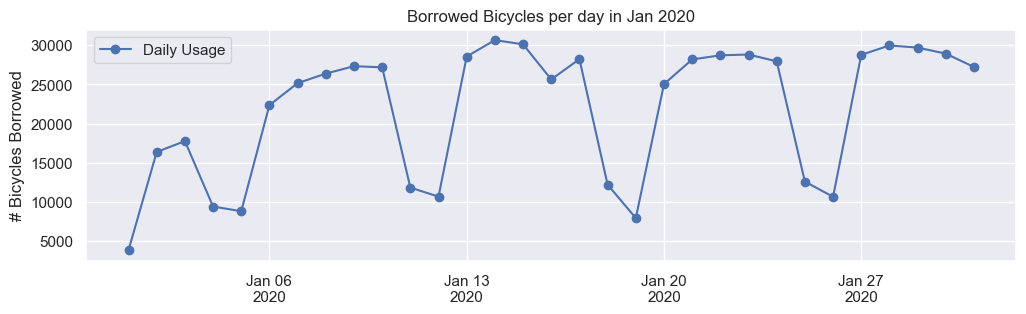

In [9]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_day["usage_count"], marker="o", linestyle="-", label="Daily Usage")
ax.set_ylabel("# Bicycles Borrowed")
ax.set_title("Borrowed Bicycles per day in Jan 2020")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d\n%Y"))
ax.legend()
plt.show()

In [10]:
df_day = pd.DataFrame(df["Bicycle"].resample("D").count().rename("usage_count"))
bicycle_data = df_day["usage_count"]

df_day.head()

,usage_count
Borrow_datetime,
2020-01-01,3854
2020-01-02,16374
2020-01-03,17766
2020-01-04,9417
2020-01-05,8812


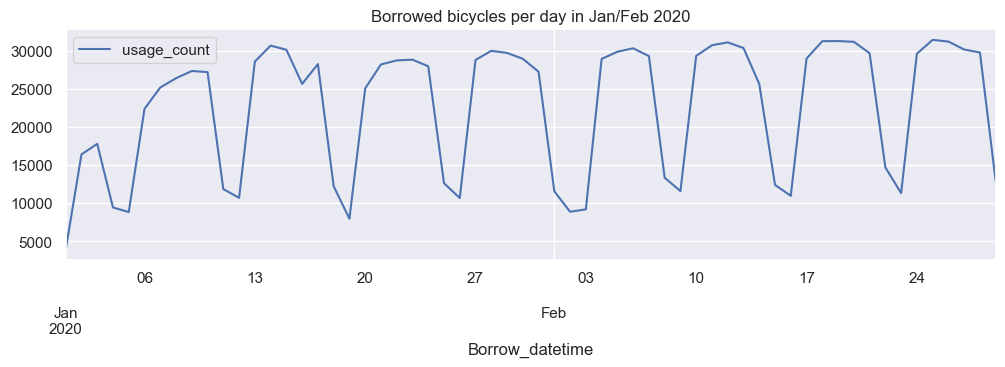

In [11]:
df_day.plot(title="Borrowed bicycles per day in Jan/Feb 2020", figsize=(12, 3))
plt.show()

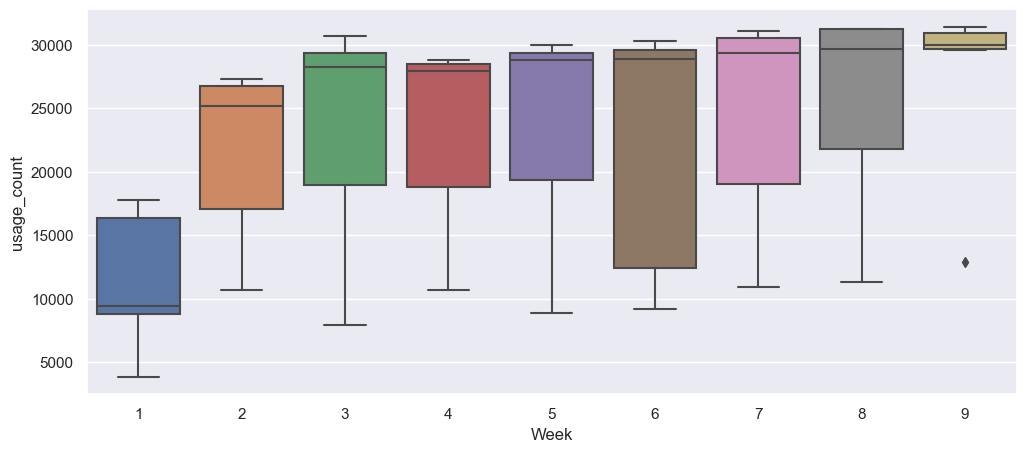

In [12]:
df_day["Year"] = df_day.index.year
df_day["Month"] = df_day.index.month
df_day["Week"] = df_day.index.isocalendar().week
df_day["Weekday"] = df_day.index.dayofweek
df_day["Weekday Name"] = df_day.index.day_name()

plt.rcParams["figure.figsize"] = (12, 5)
sns.boxplot(data=df_day, x="Week", y="usage_count")
plt.show()

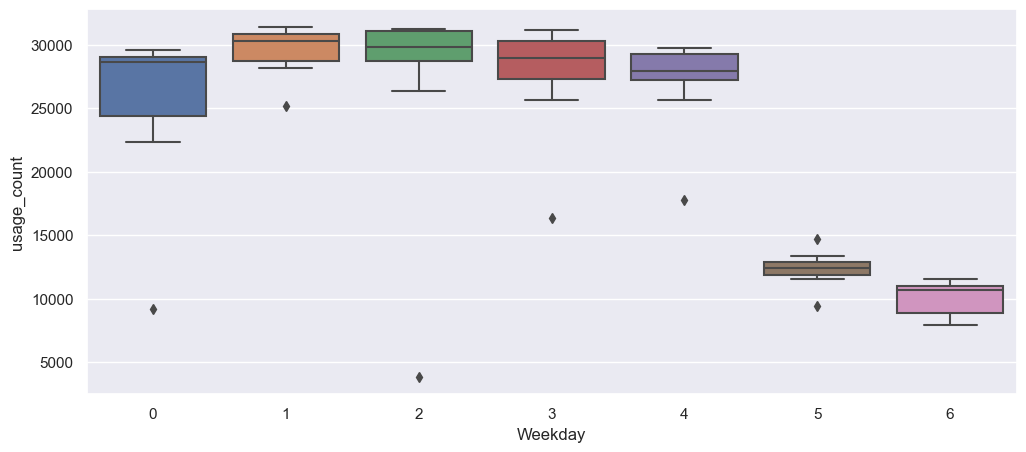

In [13]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.boxplot(data=df_day, x="Weekday", y="usage_count")
plt.show()

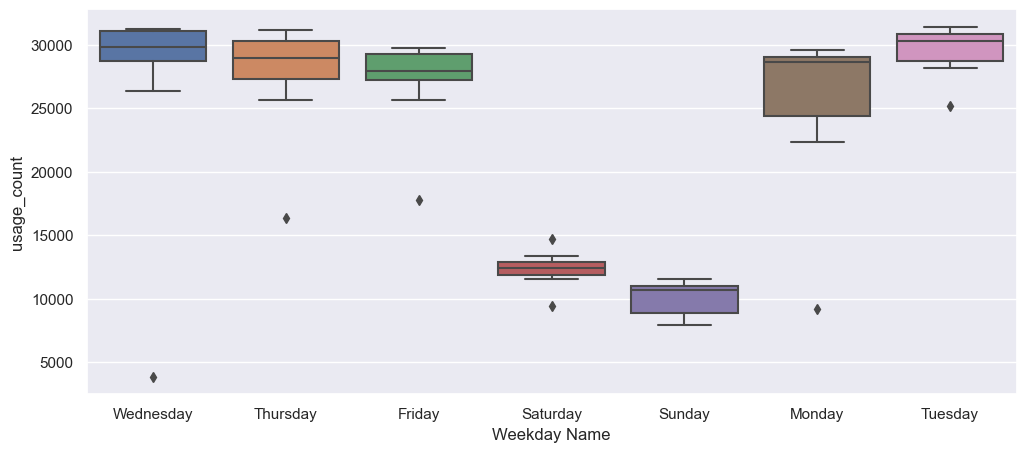

In [14]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.boxplot(data=df_day, x="Weekday Name", y="usage_count")
plt.show()

In [15]:
dfp = df_day.pivot(index="Weekday", columns="Week", values="usage_count")
dfp

Week,1,2,3,4,5,6,7,8,9
Weekday,,,,,,,,,
0,NaN,22354.0,28554.0,25035.0,28770.0,9171.0,29307.0,28956.0,29588.0
1,NaN,25157.0,30650.0,28180.0,29963.0,28903.0,30699.0,31230.0,31405.0
2,3854.0,26373.0,30110.0,28711.0,29695.0,29850.0,31079.0,31247.0,31184.0
3,16374.0,27323.0,25631.0,28810.0,28922.0,30298.0,30335.0,31148.0,30138.0
4,17766.0,27176.0,28223.0,27941.0,27222.0,29279.0,25616.0,29658.0,29749.0
5,9417.0,11829.0,12205.0,12596.0,11535.0,13320.0,12376.0,14678.0,12860.0
6,8812.0,10681.0,7941.0,10655.0,8851.0,11566.0,10944.0,11298.0,NaN


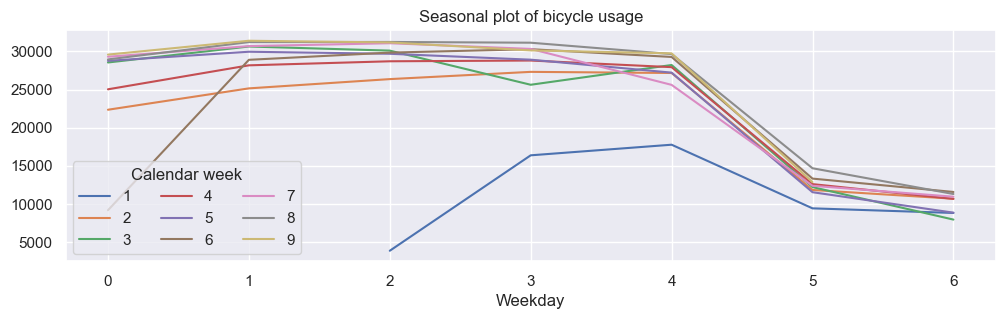

In [16]:
# all the weeks in a year, for every day of the week the count is teh same across the year
dfp.plot(title="Seasonal plot of bicycle usage", figsize=(12, 3))
plt.legend(title="Calendar week", loc="lower left", ncol=3)
plt.show()

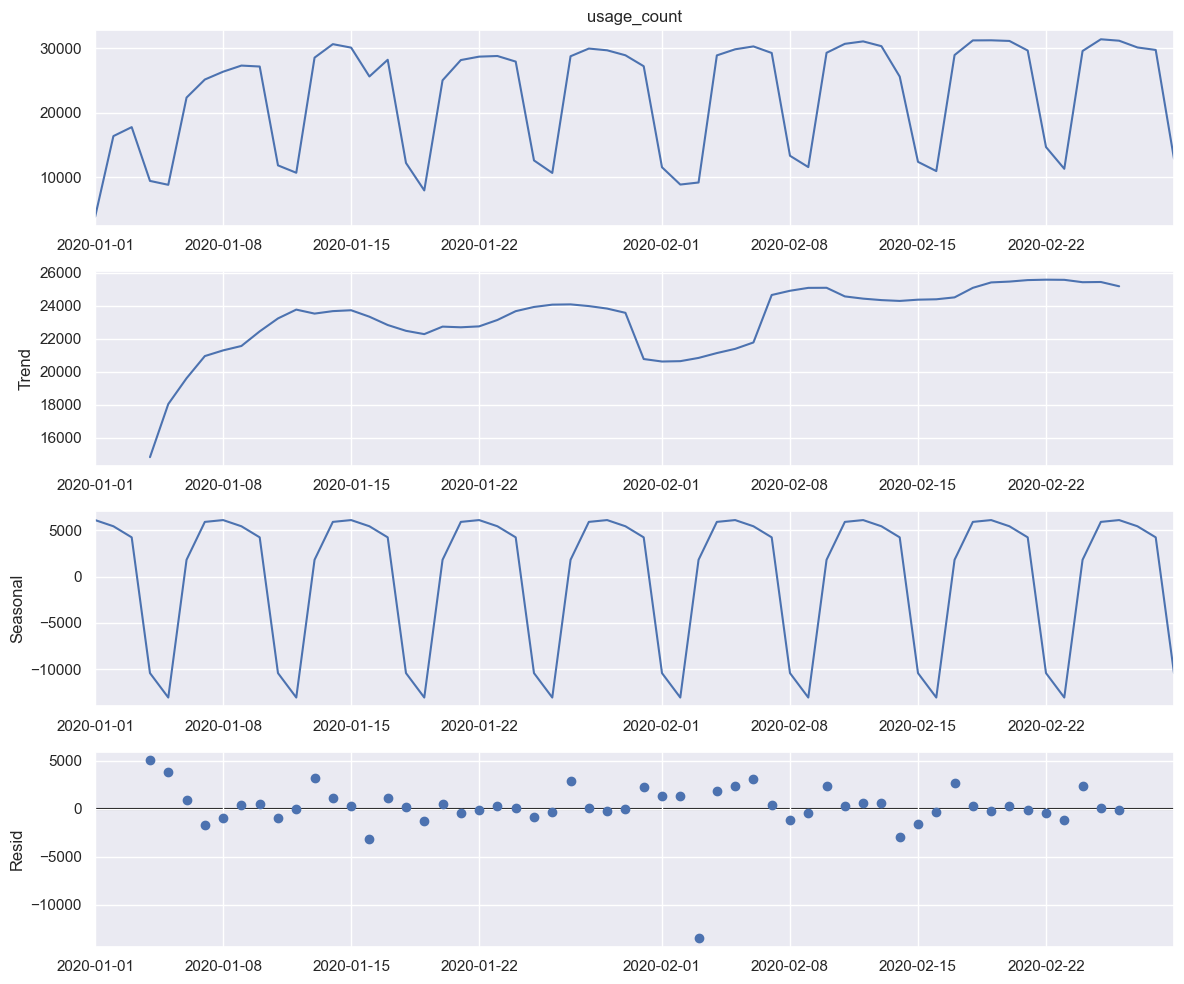

In [17]:
plt.rcParams["figure.figsize"] = (12, 10)
decompose = sm.tsa.seasonal_decompose(bicycle_data, model="additive", period=7)
decompose.plot()
plt.show()

## Autocorrelation
When the mean, variance/std and autocorrelation is constant then the series is stationary

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def acf_pacf_plot(y, lags=40):
    fig, ax = plt.subplots(1,2, figsize=(10, 3))
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1], method='ywm')
    sns.despine()
    fig.tight_layout()
    return fig, ax


### White noise

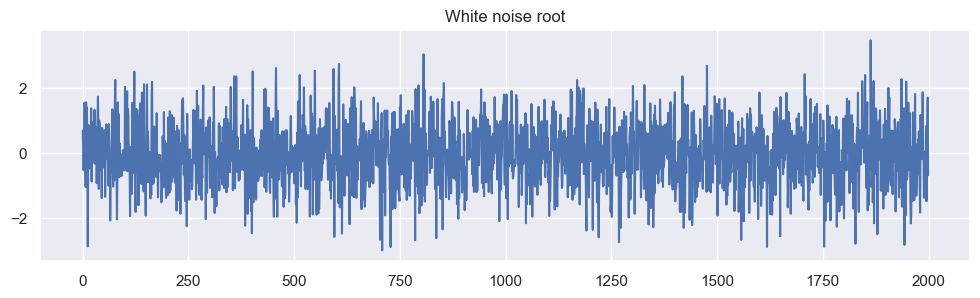

In [19]:
white_noise = pd.Series(np.random.randn(2000))
white_noise.plot(figsize=(12, 3), title="White noise root")
plt.show()

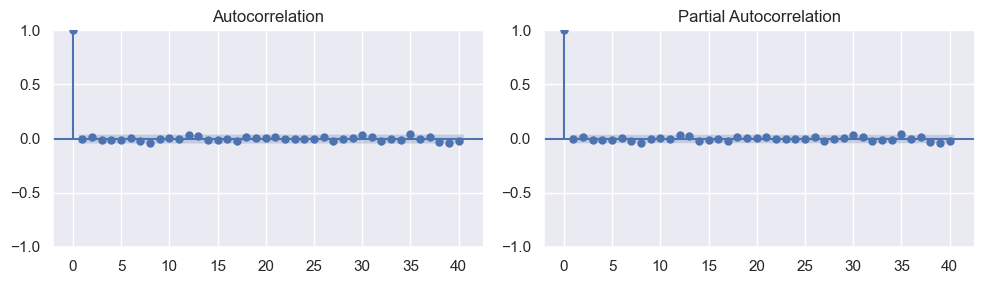

In [20]:
acf_pacf_plot(white_noise)
plt.show()

### Random walk

generate random values such that vi is dependent on vi-1

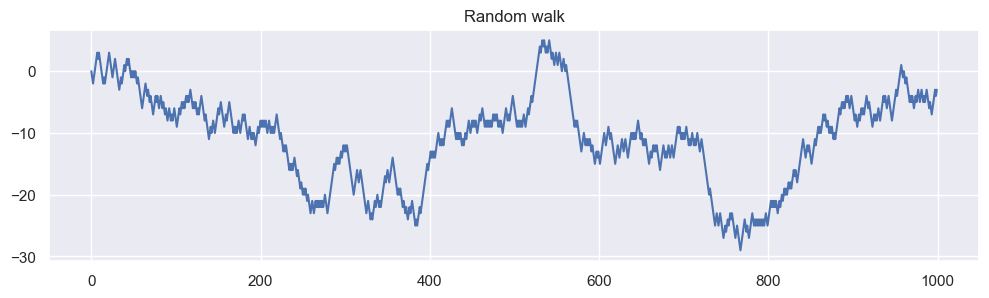

In [21]:
rw = [0]

num_steps = 1000
for i in range(1, num_steps):
    num = -1 if np.random.random() < 0.5 else 1
    rw.append(rw[-1] + num)
    
random_walk = pd.Series(rw)
random_walk.plot(figsize=(12, 3), title="Random walk")
plt.show()

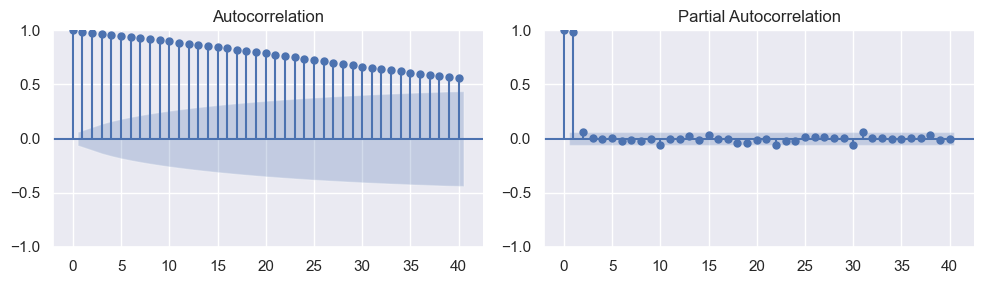

In [22]:
acf_pacf_plot(random_walk)
plt.show()

### Bicycle data

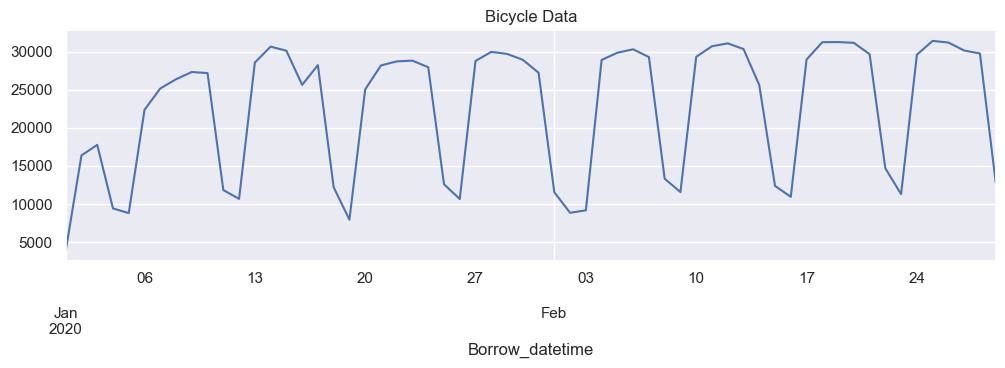

In [23]:
bicycle_data.plot(figsize=(12, 3), title="Bicycle Data")
plt.show()

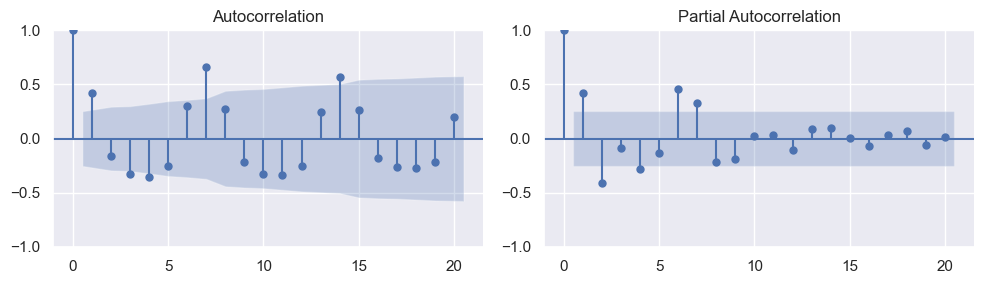

In [24]:
acf_pacf_plot(bicycle_data, lags=20)
plt.show()

## Stationary tests

In [25]:
import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(ts, p=0.05, max_lag=None, regression="c"):
    """Augmented Dickey Fuller Test for stationarity"""
    result = adfuller(ts, maxlag=max_lag, regression=regression)
    labels = ["ADF test statistics", "P-value", "# Lags used", "# Observations used"]
    
    print(f"Running ADF test with p-threshold {p}\n")
    for value, label in zip(result, labels):
        print(f"{label}: {str(value)}")
    print()
    
    if result[1] <= p:
        print("Reject the ADF null hypothesis. Time series is STATIONARY")
    else:
        print("cannot reject the ADF null hypothesis. Time series must be NON-STATIONARY")
        

def kpss_test(ts, p=0.05, n_lags="auto"):
    """kwiatkowski-Philips-Schmidt-Shin test for stationarity"""
    result = kpss(ts, nlags=n_lags)
    labels = ["KPSS test statistics", "P-value", "# lags used"]
    
    print(f"Running KPSS test with p-threshold {p}\n")
    for value, label in zip(result, labels):
        print(f"{label}: {str(value)}")
    print()
    
    if result[1] <= p:
        print("Reject the KPSS null hypothesis. Time series is be NON-STATIONARY")
    else:
        print("Cannot reject the KPSS null hypothesis. Time series must be STATIONARY")


def ocsb_test(ts, m):
    """Osborn-Chui-Smith-Birchenhall test for stationarity on seasonal data"""
    print(f"Running OCSB test with seasonal period {m}\n")
    
    n_diff_ocsb = pmd.arima.OCSBTest(m=m).estimate_seasonal_differencing_term(ts)
    
    if n_diff_ocsb > 0:
        print("Time series is NON-STATIONARY and requires seasonal differencing.")
    
    else:
        print("Time Series is seasonaly STATIONARY.")
        
    print(f"Recommended Order of seasonal differencing: {n_diff_ocsb}\n")
    


#### Test white noise for stationarity

In [26]:
adf_test(white_noise)
print("\n---\n")
kpss_test(white_noise)

Running ADF test with p-threshold 0.05

ADF test statistics: -44.77249259457944
P-value: 0.0
# Lags used: 0
# Observations used: 1999

Reject the ADF null hypothesis. Time series is STATIONARY

---

Running KPSS test with p-threshold 0.05

KPSS test statistics: 0.056577311033862446
P-value: 0.1
# lags used: 6

Cannot reject the KPSS null hypothesis. Time series must be STATIONARY


/Users/abdulfatahadeneye/PycharmProjects/.venvs/getting-started-with-time-series-forcasting/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### Test random walk for stationarity

In [27]:
adf_test(random_walk)
print("\n---\n")
kpss_test(random_walk)

Running ADF test with p-threshold 0.05

ADF test statistics: -2.1449174437151393
P-value: 0.2268406300973298
# Lags used: 1
# Observations used: 998

cannot reject the ADF null hypothesis. Time series must be NON-STATIONARY

---

Running KPSS test with p-threshold 0.05

KPSS test statistics: 0.44271294341151823
P-value: 0.058744420943311115
# lags used: 19

Cannot reject the KPSS null hypothesis. Time series must be STATIONARY


#### Test Bicycle data for stationarity

In [28]:
adf_test(bicycle_data)
print("\n---\n")
kpss_test(bicycle_data)
print("\n---\n")
ocsb_test(bicycle_data, 7)

Running ADF test with p-threshold 0.05

ADF test statistics: -2.2491923182839635
P-value: 0.18887806882388808
# Lags used: 8
# Observations used: 51

cannot reject the ADF null hypothesis. Time series must be NON-STATIONARY

---

Running KPSS test with p-threshold 0.05

KPSS test statistics: 0.2885203692719254
P-value: 0.1
# lags used: 1

Cannot reject the KPSS null hypothesis. Time series must be STATIONARY

---

Running OCSB test with seasonal period 7

Time series is NON-STATIONARY and requires seasonal differencing.
Recommended Order of seasonal differencing: 1



/Users/abdulfatahadeneye/PycharmProjects/.venvs/getting-started-with-time-series-forcasting/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Detrending a series

A single difference takes away a linear trend you can test for (seasonal) stationarity.

In [29]:
# data.diff().dropna()
# data.plot(title="data - first difference")
# plt.show()

## Classical Forecasting Methods

In [30]:
train = bicycle_data[:-15]
test = bicycle_data[-15:]

print(f"{train.shape=}\n{test.shape=}")

train.shape=(45,)
test.shape=(15,)


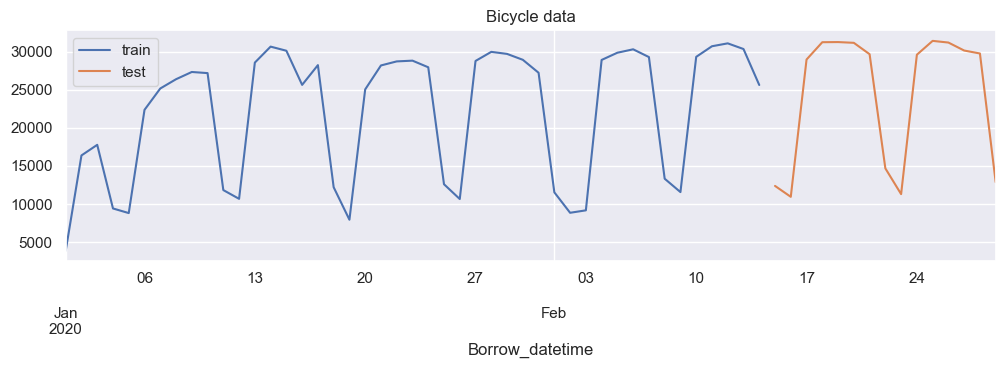

In [31]:
train.plot(figsize=(12, 3), title="Bicycle data", label="train")
test.plot(figsize=(12, 3), label="test")

plt.legend(loc="upper left")
plt.show()

#### ETS

The ETS models are a family of time series models with an underlying state space model consisting of a level component, a trend component (T), a seasonal component (S), and an error term (E).

```python
# Additive Holt Winters: ETS(A,A,A)
ETSModel(train, error="add", trend="add", seasonal="add",  seasonal_period=7)

# Multiplicative Holt Winters: ETS(A,A,M)
ETSModel(train, error="add", trend="add", seasonal="mul",  seasonal_period=7)

# Additive Damped Holt Winters: ETS(A,Ad,A)
ETSModel(train, error="add", trend="add", seasonal="add",  seasonal_period=7, damped_trend=True)

# Multiplicative Damped Holt Winters: ETS(A,Ad,M)
ETSModel(train, error="add", trend="add", seasonal="mul",  seasonal_period=7, damped_trend=True)

# No trend Holt Winters: ETS(A,N,A)
ETSModel(train, error="add", trend=None, seasonal="mul",  seasonal_period=7)
```

In [41]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel



def run_ets(train_data, test_data, error, trend, seasonal, seasonal_periods, damped_trend, name):
    ets = ETSModel(train_data, error=error, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods, damped_trend=damped_trend).fit()
    ets.summary()

    ets_predictions = ets.get_prediction(start=test_data.index.min().date(), end=test_data.index.max().date())
    ets_mean_predictions = ets_predictions.predicted_mean
    ets_mean_predictions.name = name

    ets_predictions_int_95 = ets_predictions.pred_int(alpha=0.05)
    ets_predictions_int_80 = ets_predictions.pred_int(alpha=0.20)

    # plot train test: two plots. 
    # - one with train, test and predictions
    # - and the other with just test and prediction
    for i in range(2):
        if not i:
            # plot train only once
            train_data.plot(figsize=(12, 3), title="Bicycle data", label="train")
        test_data.plot(figsize=(12, 3), label="test")

        # plot predictions
        ets_mean_predictions.plot(label="ETS(AAA)", color="black")

        plt.fill_between(
            test_data.index, 
            ets_predictions_int_95.iloc[:, 0],
            ets_predictions_int_95.iloc[:, 1],
            color="b", alpha=0.2, label="p95"
        )

        plt.fill_between(
            test_data.index, 
            ets_predictions_int_80.iloc[:, 0],
            ets_predictions_int_80.iloc[:, 1],
            color="b", alpha=0.3, label="p80"
        )

        plt.legend(loc="upper left")
        plt.show()

    return ets, ets_predictions


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07186D+01    |proj g|=  9.88789D-01

At iterate    1    f=  1.02626D+01    |proj g|=  3.50945D-01

At iterate    2    f=  1.02218D+01    |proj g|=  1.28460D-01

At iterate    3    f=  1.02169D+01    |proj g|=  2.27072D-01

At iterate    4    f=  1.02124D+01    |proj g|=  9.06743D-02

At iterate    5    f=  1.02106D+01    |proj g|=  3.89297D-02

At iterate    6    f=  1.02088D+01    |proj g|=  5.57280D-02

At iterate    7    f=  1.02081D+01    |proj g|=  4.27349D-02

At iterate    8    f=  1.02078D+01    |proj g|=  7.02212D-03

At iterate    9    f=  1.02078D+01    |proj g|=  1.01981D-03

At iterate   10    f=  1.02078D+01    |proj g|=  2.66454D-05

At iterate   11    f=  1.02078D+01    |proj g|=  1.38556D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

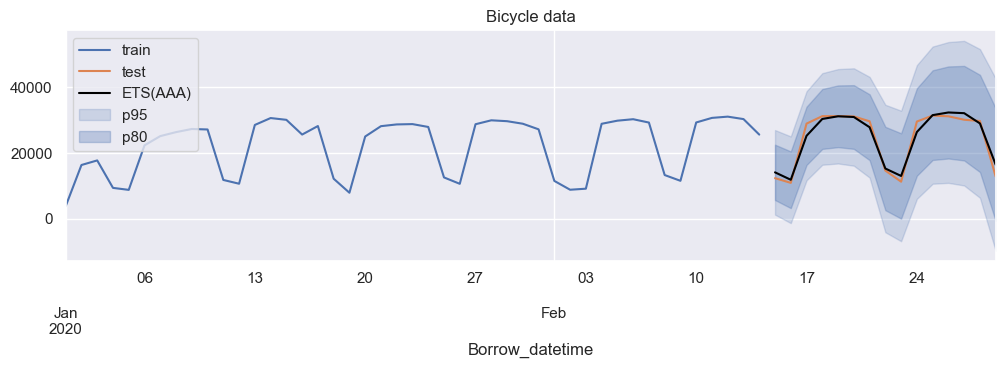

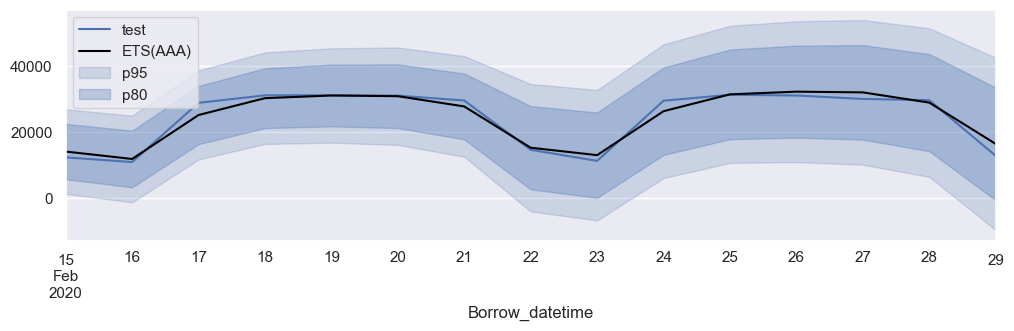

In [47]:
# Additive Holt Winters: ETS(A,A,A)
ets_aaa, ets_aaa_predictions = run_ets(
    train, test, 
    error="add", trend="add", seasonal="add",  seasonal_periods=7, damped_trend=False, 
    name="add_holt_winters_ETS(AAA)"
)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08877D+01    |proj g|=  1.77566D+00

At iterate    1    f=  1.02269D+01    |proj g|=  4.38859D-01

At iterate    2    f=  1.00333D+01    |proj g|=  3.82598D-01

At iterate    3    f=  9.92778D+00    |proj g|=  3.46207D-01

At iterate    4    f=  9.87863D+00    |proj g|=  3.98031D-01

At iterate    5    f=  9.85135D+00    |proj g|=  5.84537D-01

At iterate    6    f=  9.82222D+00    |proj g|=  5.82295D-01

At iterate    7    f=  9.79287D+00    |proj g|=  5.52179D-01

At iterate    8    f=  9.74459D+00    |proj g|=  6.48095D-01

At iterate    9    f=  9.70297D+00    |proj g|=  2.52660D-01

At iterate   10    f=  9.69816D+00    |proj g|=  2.09104D-01

At iterate   11    f=  9.69290D+00    |proj g|=  2.07898D-01

At iterate   12    f=  9.69119D+00    |proj g|=  7.47914D-02

At iterate   13    f=  9.6

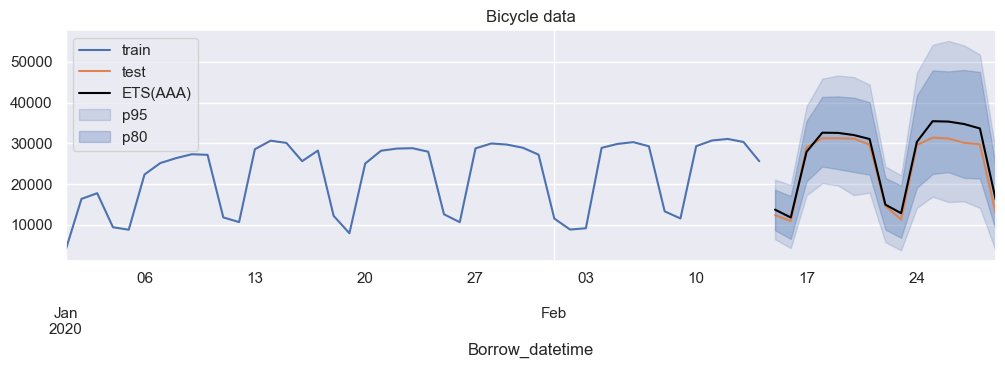

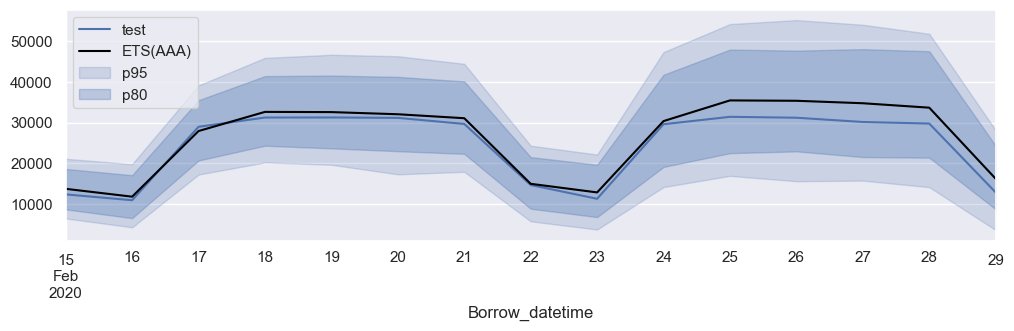

In [48]:
# Multiplicative Holt Winters: ETS(A,A,M)
ets_aam, ets_aam_predictions = run_ets(
    train, test, 
    error="add", trend="add", seasonal="mul",  seasonal_periods=7, damped_trend=False, 
    name="add_mul_holt_winters_ETS(AAM)"
)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  1.06951D+01    |proj g|=  9.88789D-01

At iterate    1    f=  1.02696D+01    |proj g|=  7.18298D-01

At iterate    2    f=  1.01899D+01    |proj g|=  1.11789D-01

At iterate    3    f=  1.01798D+01    |proj g|=  9.33060D-02

At iterate    4    f=  1.01702D+01    |proj g|=  1.06674D-01

At iterate    5    f=  1.01652D+01    |proj g|=  9.19625D-02

At iterate    6    f=  1.01620D+01    |proj g|=  9.64514D-02

At iterate    7    f=  1.01612D+01    |proj g|=  2.97190D-02

At iterate    8    f=  1.01610D+01    |proj g|=  1.62307D-02

At iterate    9    f=  1.01609D+01    |proj g|=  1.67990D-03

At iterate   10    f=  1.01609D+01    |proj g|=  3.71259D-04

At iterate   11    f=  1.01609D+01    |proj g|=  1.15286D-04

At iterate   12    f=  1.01609D+01    |proj g|=  4.95603D-05

           * * *

Tit   = 

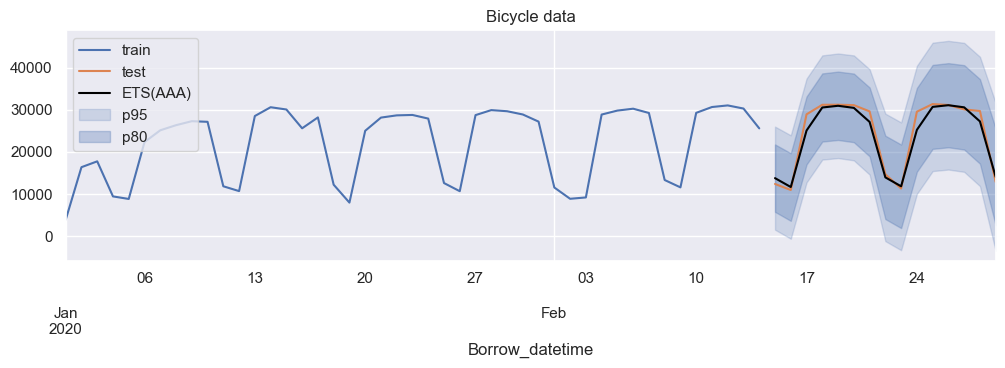

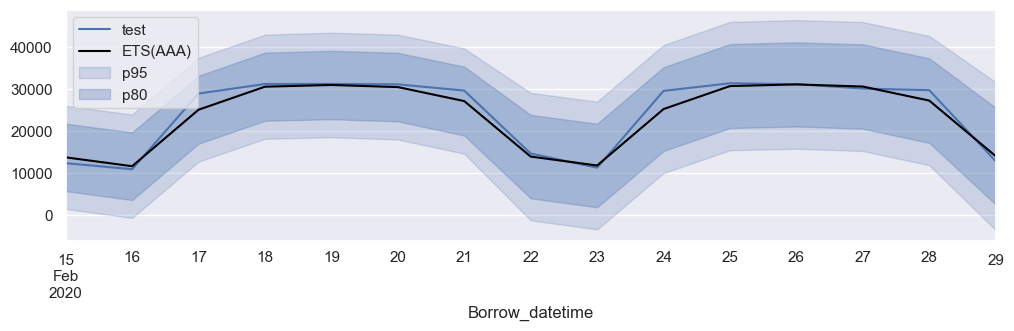

In [51]:

# Additive Damped Holt Winters: ETS(A,Ad,A)
ets_aada, ets_aada_predictions = run_ets(
    train, test,
    error="add", trend="add", seasonal="add",  seasonal_periods=7, damped_trend=True, 
    name="add_damped_holt_winters_ETS(AAdA)"
)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  1.08387D+01    |proj g|=  1.70888D+00

At iterate    1    f=  9.98312D+00    |proj g|=  2.75661D-01

At iterate    2    f=  9.94180D+00    |proj g|=  2.15372D-01

At iterate    3    f=  9.92144D+00    |proj g|=  2.58711D-01

At iterate    4    f=  9.90502D+00    |proj g|=  2.82068D-01

At iterate    5    f=  9.85374D+00    |proj g|=  9.05547D-01

At iterate    6    f=  9.80828D+00    |proj g|=  3.10378D-01

At iterate    7    f=  9.79961D+00    |proj g|=  1.95926D-01

At iterate    8    f=  9.79703D+00    |proj g|=  2.16674D-01

At iterate    9    f=  9.77993D+00    |proj g|=  3.92741D-01

At iterate   10    f=  9.75712D+00    |proj g|=  7.27023D-01

At iterate   11    f=  9.70824D+00    |proj g|=  4.47433D-01

At iterate   12    f=  9.67918D+00    |proj g|=  2.41566D-01

At iterate   13    f=  9.6

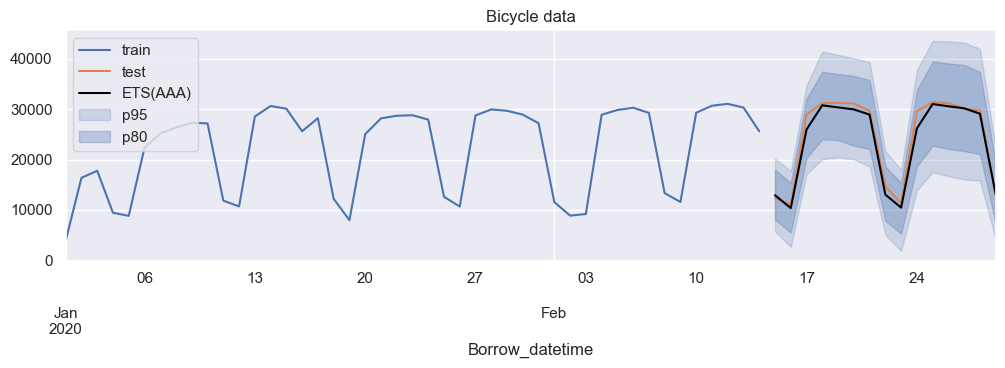

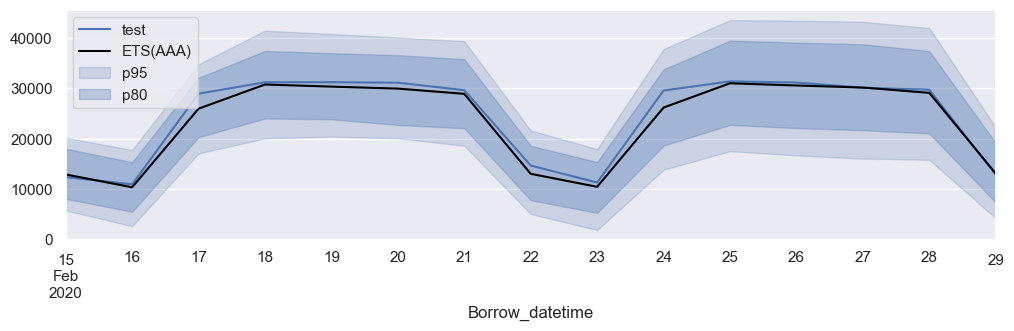

In [53]:

# Multiplicative Damped Holt Winters: ETS(A,Ad,M)
ets_aadm, ets_aadm_predictions = run_ets(
    train, test,
    error="add", trend="add", seasonal="mul",  seasonal_periods=7, damped_trend=True, 
    name="add_damped_mul_holt_winters_ETS(A,Ad,M)"
)

In [ ]:

# No trend Holt Winters: ETS(A,N,A)
ets_aaa, ets_aaa_predictions = run_ets(
    train, test,
    error="add", trend=None, seasonal="mul",  seasonal_period=7, damped_trend=True, 
    name="add_holt_winters_ETS(AAA)"
)